In [1]:
# ⬇️ Clone fresh from GitHub
!git clone https://github.com/leenslf/AOD-Net-colab.git

# 📂 Change into the repo directory
%cd AOD-Net-colab



Cloning into 'AOD-Net-colab'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 137 (delta 64), reused 95 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (137/137), 2.87 MiB | 22.08 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/AOD-Net-colab


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/clearDive/

100_dehazed	       100_raw_cropped	      DAVIS_boosted_dehazed
100_dehazed_cropped    100_reference	      DAVIS_dehazed
100_dehazed_FUnIE-GAN  100_reference_cropped  raw-890
100_dehazed_Uiec2Net   100_Uiec2Net	      reference-890
100_FUnIE-GAN	       DAVIS		      train
100_raw		       DAVIS_boosted	      val


## Preproccessing (crop in place of resizing)

In [3]:
import os
from PIL import Image

def center_crop_to_size(img, crop_size):
    img_width, img_height = img.size
    target_width, target_height = crop_size
    left = (img_width - target_width) // 2
    top = (img_height - target_height) // 2
    right = left + target_width
    bottom = top + target_height
    return img.crop((left, top, right, bottom))

def crop_images_in_directory(input_dir, output_dir, crop_size=(480, 640), formats=(".jpg", ".jpeg", ".png")):
    os.makedirs(output_dir, exist_ok=True)
    count = 0
    for file in os.listdir(input_dir):
        if file.lower().endswith(formats):
            try:
                img_path = os.path.join(input_dir, file)
                img = Image.open(img_path).convert("RGB")
                if img.width < crop_size[1] or img.height < crop_size[0]:
                    print(f"Skipping {file} — too small for crop")
                    continue
                cropped = center_crop_to_size(img, crop_size)
                save_path = os.path.join(output_dir, file)
                cropped.save(save_path)
                count += 1
            except Exception as e:
                print(f"Failed to process {file}: {e}")
    print(f"✅ Cropped and saved {count} image(s) to: {output_dir}")


In [4]:
# Crop test images
crop_images_in_directory("/content/drive/MyDrive/clearDive/100_raw", "/content/drive/MyDrive/clearDive/100_raw_cropped")


KeyboardInterrupt: 

In [ ]:
# Crop reference images
crop_images_in_directory("/content/drive/MyDrive/clearDive/100_reference", "/content/drive/MyDrive/clearDive/100_reference_cropped")

##Training

In [ ]:
!python train.py \
  --epochs 10 \
  --net_name colab-run \
  --lr 1e-4 \
  --use_gpu true \
  --gpu 0 \
  --ori_data_path /content/drive/MyDrive/data/train/ori/ \
  --haze_data_path /content/drive/MyDrive/data/train/haze/ \
  --val_ori_data_path /content/drive/MyDrive/data/val/ori/ \
  --val_haze_data_path /content/drive/MyDrive/data/val/haze/ \
  --num_workers 2 \
  --batch_size 4 \
  --val_batch_size 4 \
  --print_gap 10 \
  --model_dir ./models \
  --log_dir ./logs \
  --sample_output_folder ./samples


Streaming output truncated to the last 5000 lines.
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_1359.jpg
   - Haze image: /content/drive/MyDrive/data/train/haze/NYU2_1359_1_1.jpg

🔍 Index 250
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_1362.jpg
   - Haze image: /content/drive/MyDrive/data/train/haze/NYU2_1362_4_1.jpg
Epoch: 8/10 | Step: 99/126 | LR: 0.000100 | Loss: 0.012751

🔍 Index 9
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_312.jpg
   - Haze image: /content/drive/MyDrive/data/train/haze/NYU2_312_7_2.jpg

🔍 Index 499
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_590.jpg
   - Haze image: /content/drive/MyDrive/data/train/haze/NYU2_590_4_3.jpg

🔍 Index 442
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_134.jpg
   - Haze image: /content/drive/MyDrive/data/train/haze/NYU2_134_3_2.jpg

🔍 Index 46
   - Ori image : /content/drive/MyDrive/data/train/ori/NYU2_1216.jpg
   - Haze image: /content/drive/MyDrive/data/train

##Testing

In [ ]:
# 📍 Paths
NET_NAME = ""  # ← no subfolder
CKPT_NAME = "AOD_9.pkl"
MODEL_DIR = "/content/AOD-Net-colab/models"
TEST_IMG_DIR = "/content/drive/MyDrive/clearDive/100_raw_cropped"
SAVE_DIR = "/content/drive/MyDrive/clearDive/100_dehazed_cropped"

# ✅ Ensure results directory exists
import os
os.makedirs(SAVE_DIR, exist_ok=True)

# 🚀 Run demo.py with corrected model path
!python demo.py \
  --net_name "$NET_NAME" \
  --use_gpu true \
  --model_dir $MODEL_DIR \
  --ckpt $CKPT_NAME \
  --test_img_dir $TEST_IMG_DIR \
  --sample_output_folder $SAVE_DIR


2025-05-24 17:37:32,951 - utils - INFO - Entered module: utils
Namespace(ori_data_path='ori', haze_data_path='haze', val_ori_data_path='val_ori', val_haze_data_path='val_haze', sample_output_folder='/content/drive/MyDrive/clearDive/100_dehazed_cropped', use_gpu=True, gpu=-1, lr=0.0001, num_workers=4, print_gap=50, batch_size=16, val_batch_size=16, epochs=10, model_dir='/content/AOD-Net-colab/models', log_dir='./log', ckpt='AOD_9.pkl', net_name='', weight_decay=0.0001, grad_clip_norm=0.1, test_img_dir='/content/drive/MyDrive/clearDive/100_raw_cropped')
2025-05-24 17:37:32,962 - make_test_data - INFO - Start running make_test_data
2025-05-24 17:37:32,976 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-24 17:37:32,976 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 65536
2025-05-24 17:37:33,015 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-24 17:37:33,016 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 65536
2025-05-24 17:37:33,048 - PIL.PngImagePlugin - DEBUG 

In [ ]:
dehazeduie= "/content/drive/MyDrive/clearDive/100_dehazed_cropped/869_img_.png"
reference = "/content/drive/MyDrive/clearDive/100_reference_cropped/869_img_.png"
uie = "/content/drive/MyDrive/clearDive/100_raw_cropped/869_img_.png"


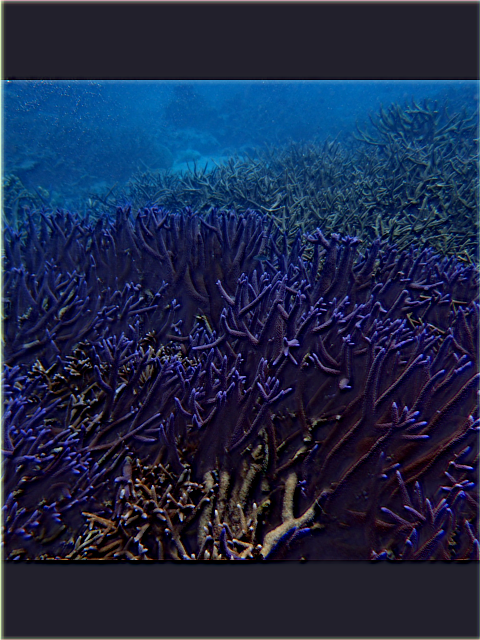
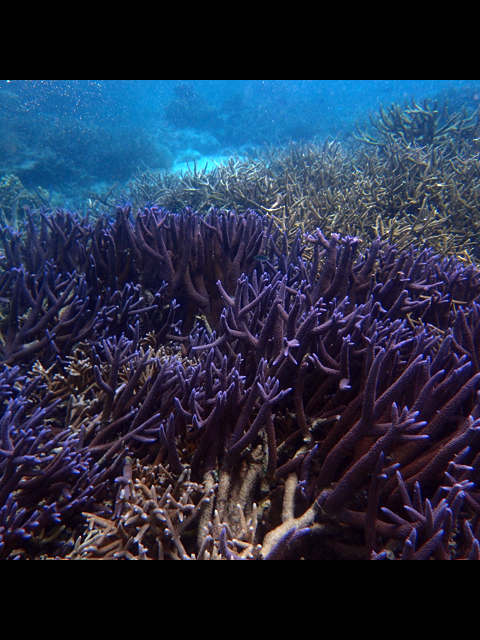
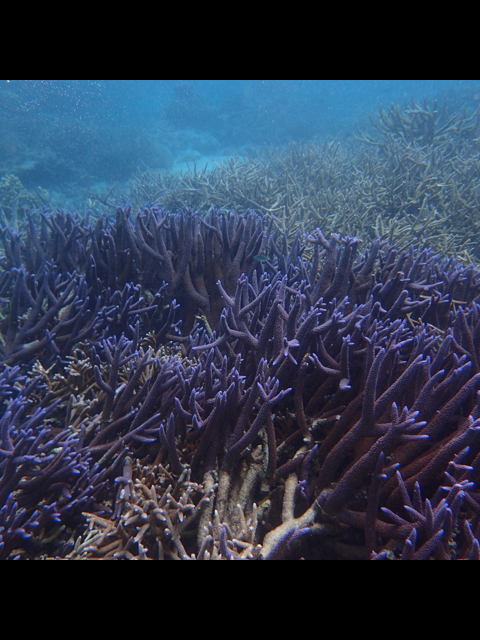

In [ ]:
from IPython.display import display, HTML
import base64
dehazeduie= "/content/drive/MyDrive/clearDive/100_dehazed_cropped/869_img_.png"
reference = "/content/drive/MyDrive/clearDive/100_reference_cropped/869_img_.png"
uie = "/content/drive/MyDrive/clearDive/100_raw_cropped/869_img_.png"

def image_to_base64(path):
    with open(path, "rb") as f:
        data = f.read()
    return base64.b64encode(data).decode("utf-8")

def show_side_by_side(output_path, raw_path, reference_path, labels=("Dehazed with AOD-Net", "Reference", "Raw")):
    output_img = image_to_base64(output_path)
    raw_img = image_to_base64(raw_path)
    ref_img = image_to_base64(reference_path)

    html = f"""
    <div style="display: flex; justify-content: space-around;">
        <div>
            <p style="text-align:center">{labels[0]}</p>
            <img src="data:image/png;base64,{output_img}" style="max-height:300px;">
        </div>
        <div>
            <p style="text-align:center">{labels[1]}</p>
            <img src="data:image/png;base64,{raw_img}" style="max-height:300px;">
        </div>
        <div>
            <p style="text-align:center">{labels[2]}</p>
            <img src="data:image/png;base64,{ref_img}" style="max-height:300px;">
        </div>
    </div>
    """
    display(HTML(html))

# Call it with your paths
show_side_by_side(dehazeduie, reference, uie)


##Quality Assessment (Reference & Non-reference)



In [20]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, color, filters, measure
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

class UnderwaterImageQualityAssessment:
    def __init__(self, image_dir):
        self.image_dir = image_dir
        self.results = []

    def load_image(self, image_path):
        """Load and preprocess image"""
        img = cv2.imread(image_path)
        if img is None:
            return None
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img_rgb

    def calculate_uciqe(self, img):
        """
        Underwater Color Image Quality Evaluation (UCIQE)
        Based on chroma, saturation, and contrast
        """
        # Convert to different color spaces
        lab = color.rgb2lab(img)

        # Chroma calculation
        chroma = np.sqrt(lab[:,:,1]**2 + lab[:,:,2]**2)
        uc = np.mean(chroma)
        sigma_c = np.std(chroma)

        # Saturation calculation
        hsv = color.rgb2hsv(img)
        us = np.mean(hsv[:,:,1])

        # Contrast calculation (using luminance)
        luminance = lab[:,:,0]
        ul = np.mean(luminance)
        sigma_l = np.std(luminance)

        # UCIQE formula
        uciqe = 0.4680 * sigma_c + 0.2745 * (ul/100) + 0.2576 * us

        return uciqe

    def calculate_uiqm(self, img):
        """
        Underwater Image Quality Measure (UIQM)
        Combines colorfulness, sharpness, and contrast
        """
        # Convert to different color spaces
        lab = color.rgb2lab(img)

        # 1. Colorfulness measure (UICM)
        rg = img[:,:,0] - img[:,:,1]
        yb = 0.5 * (img[:,:,0] + img[:,:,1]) - img[:,:,2]
        rg_mean, rg_std = np.mean(rg), np.std(rg)
        yb_mean, yb_std = np.mean(yb), np.std(yb)
        uicm = -0.0268 * np.sqrt(rg_mean**2 + yb_mean**2) + 0.1586 * np.sqrt(rg_std**2 + yb_std**2)

        # 2. Sharpness measure (UISM)
        gray = color.rgb2gray(img)
        sobel_h = filters.sobel_h(gray)
        sobel_v = filters.sobel_v(gray)
        sobel = np.sqrt(sobel_h**2 + sobel_v**2)
        uism = np.mean(sobel)

        # 3. Contrast measure (UIConM)
        # Using luminance from LAB
        luminance = lab[:,:,0]
        uiconm = np.std(luminance)

        # Combine measures
        uiqm = 0.0282 * uicm + 0.2953 * uism + 3.5753 * uiconm

        return uiqm, uicm, uism, uiconm

    def calculate_niqe_simple(self, img):
        """
        Simplified NIQE-like metric using image statistics
        """
        gray = color.rgb2gray(img)

        # Local mean and variance
        mu = ndimage.uniform_filter(gray, size=7)
        mu_sq = ndimage.uniform_filter(gray**2, size=7)
        sigma = np.sqrt(np.maximum(mu_sq - mu**2, 0))

        # Normalize
        structdis = (gray - mu) / (sigma + 1e-10)

        # Calculate features similar to NIQE
        features = []
        features.append(np.mean(structdis))
        features.append(np.std(structdis))
        features.append(np.mean(sigma))
        features.append(np.std(sigma))

        # Simple quality score (lower is better for real NIQE)
        quality_score = np.mean(np.abs(features))

        return quality_score

    def calculate_additional_metrics(self, img):
        """Calculate additional quality metrics"""
        gray = color.rgb2gray(img)

        # 1. Entropy (information content)
        entropy = measure.shannon_entropy(gray)

        # 2. Average Gradient (sharpness indicator)
        grad_x = np.abs(np.diff(gray, axis=1))
        grad_y = np.abs(np.diff(gray, axis=0))
        avg_gradient = (np.mean(grad_x) + np.mean(grad_y)) / 2

        # 3. Variance (contrast indicator)
        variance = np.var(gray)

        # 4. Standard deviation
        std_dev = np.std(gray)

        # 5. Mean brightness
        mean_brightness = np.mean(gray)

        return {
            'entropy': entropy,
            'avg_gradient': avg_gradient,
            'variance': variance,
            'std_dev': std_dev,
            'mean_brightness': mean_brightness
        }

    def process_single_image(self, image_path):
        """Process a single image and calculate all metrics"""
        img = self.load_image(image_path)
        if img is None:
            return None

        # Normalize image to [0,1]
        img_norm = img.astype(np.float32) / 255.0

        # Calculate metrics
        uciqe = self.calculate_uciqe(img_norm)
        uiqm, uicm, uism, uiconm = self.calculate_uiqm(img_norm)
        niqe_like = self.calculate_niqe_simple(img_norm)
        additional = self.calculate_additional_metrics(img_norm)

        result = {
            'filename': os.path.basename(image_path),
            'uciqe': uciqe,
            'uiqm': uiqm,
            'uicm': uicm,
            'uism': uism,
            'uiconm': uiconm,
            'niqe_like': niqe_like,
            **additional
        }

        return result

    def process_directory(self):
        """Process all images in the directory"""
        image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')

        for filename in os.listdir(self.image_dir):
            if filename.lower().endswith(image_extensions):
                image_path = os.path.join(self.image_dir, filename)
                print(f"Processing: {filename}")

                result = self.process_single_image(image_path)
                if result:
                    self.results.append(result)

        return pd.DataFrame(self.results)

    def generate_report(self, df):
        """Generate a comprehensive quality assessment report"""
        print("\n" + "="*60)
        print("UNDERWATER IMAGE QUALITY ASSESSMENT REPORT")
        print("="*60)

        print(f"\nTotal images processed: {len(df)}")

        print(f"\nQUALITY METRICS SUMMARY:")
        print("-" * 40)

        metrics = ['uciqe', 'uiqm', 'niqe_like', 'entropy', 'avg_gradient', 'variance']

        for metric in metrics:
            if metric in df.columns:
                mean_val = df[metric].mean()
                std_val = df[metric].std()
                min_val = df[metric].min()
                max_val = df[metric].max()

                print(f"{metric.upper():12} | Mean: {mean_val:.4f} ± {std_val:.4f} | Range: [{min_val:.4f}, {max_val:.4f}]")

        print(f"\nTOP 5 IMAGES BY UCIQE (Higher is better):")
        print("-" * 40)
        top_uciqe = df.nlargest(5, 'uciqe')[['filename', 'uciqe', 'uiqm']]
        for idx, row in top_uciqe.iterrows():
            print(f"{row['filename']:30} | UCIQE: {row['uciqe']:.4f} | UIQM: {row['uiqm']:.4f}")

        print(f"\nTOP 5 IMAGES BY UIQM (Higher is better):")
        print("-" * 40)
        top_uiqm = df.nlargest(5, 'uiqm')[['filename', 'uciqe', 'uiqm']]
        for idx, row in top_uiqm.iterrows():
            print(f"{row['filename']:30} | UCIQE: {row['uciqe']:.4f} | UIQM: {row['uiqm']:.4f}")

        return df

Starting quality assessment...
Processing: 837_img_.png
Processing: 841_img_.png
Processing: 843_img_.png
Processing: 844_img_.png
Processing: 846_img_.png
Processing: 850_img_.png
Processing: 852_img_.png
Processing: 862_img_.png
Processing: 866_img_.png
Processing: 869_img_.png
Processing: 867_img_.png
Processing: 871_img_.png
Processing: 874_img_.png
Processing: 873_img_.png
Processing: 87_img_.png
Processing: 878_img_.png
Processing: 880_img_.png
Processing: 889_img_.png
Processing: 881_img_.png
Processing: 890_img_.png
Processing: 891_img_.png
Processing: 892_img_.png
Processing: 895_img_.png
Processing: 89_img_.png
Processing: 896_img_.png
Processing: 905_img_.png
Processing: 906_img_.png
Processing: 907_img_.png
Processing: 90_img_.png
Processing: 908_img_.png
Processing: 909_img_.png
Processing: 911_img_.png
Processing: 910_img_.png
Processing: 917_img_.png
Processing: 92_img_.png
Processing: 97_img_.png
Processing: 95_img_.png
Processing: 841.png
Processing: 837.png
Processing

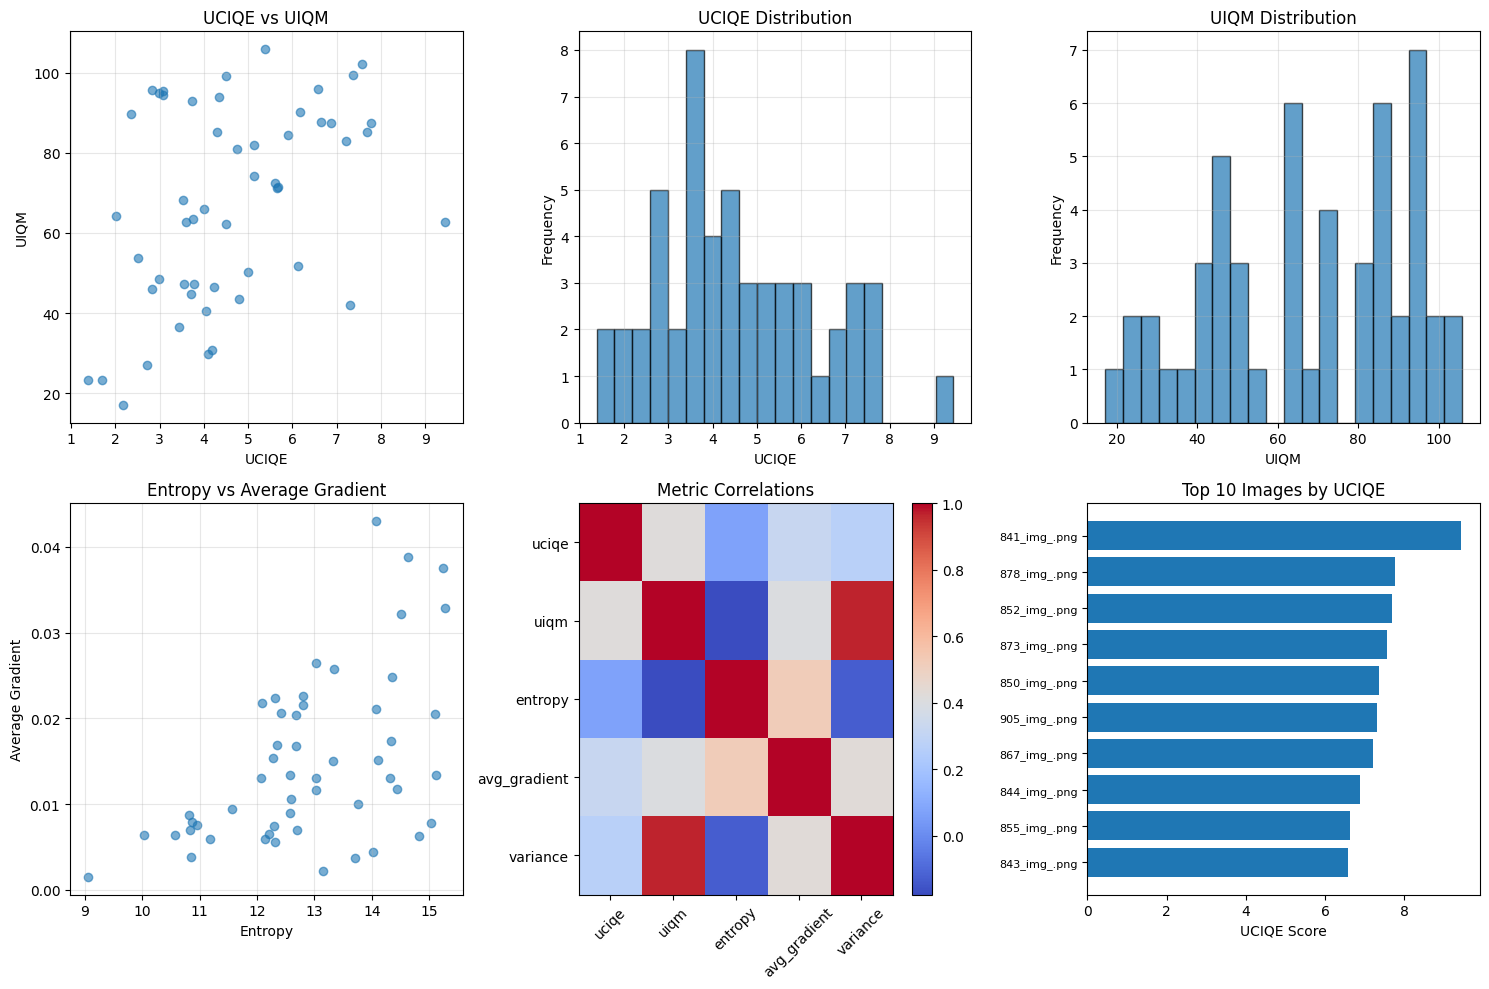


Assessment complete! Check the generated plots and CSV file for detailed results.


In [ ]:
# Usage
dehazed_dir = "/content/drive/MyDrive/clearDive/100_raw_cropped"

# Initialize the quality assessment
qa = UnderwaterImageQualityAssessment(dehazed_dir)

# Process all images
print("Starting quality assessment...")
results_df = qa.process_directory()

# Generate comprehensive report
final_report = qa.generate_report(results_df)

# Save results to CSV
output_path = os.path.join(dehazed_dir, "quality_assessment_results.csv")
results_df.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")

# Optional: Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: UCIQE vs UIQM scatter
plt.subplot(2, 3, 1)
plt.scatter(results_df['uciqe'], results_df['uiqm'], alpha=0.6)
plt.xlabel('UCIQE')
plt.ylabel('UIQM')
plt.title('UCIQE vs UIQM')
plt.grid(True, alpha=0.3)

# Plot 2: UCIQE distribution
plt.subplot(2, 3, 2)
plt.hist(results_df['uciqe'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('UCIQE')
plt.ylabel('Frequency')
plt.title('UCIQE Distribution')
plt.grid(True, alpha=0.3)

# Plot 3: UIQM distribution
plt.subplot(2, 3, 3)
plt.hist(results_df['uiqm'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('UIQM')
plt.ylabel('Frequency')
plt.title('UIQM Distribution')
plt.grid(True, alpha=0.3)

# Plot 4: Entropy vs Average Gradient
plt.subplot(2, 3, 4)
plt.scatter(results_df['entropy'], results_df['avg_gradient'], alpha=0.6)
plt.xlabel('Entropy')
plt.ylabel('Average Gradient')
plt.title('Entropy vs Average Gradient')
plt.grid(True, alpha=0.3)

# Plot 5: Correlation heatmap
plt.subplot(2, 3, 5)
correlation_metrics = ['uciqe', 'uiqm', 'entropy', 'avg_gradient', 'variance']
corr_matrix = results_df[correlation_metrics].corr()
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(correlation_metrics)), correlation_metrics, rotation=45)
plt.yticks(range(len(correlation_metrics)), correlation_metrics)
plt.title('Metric Correlations')

# Plot 6: Quality ranking
plt.subplot(2, 3, 6)
top_10 = results_df.nlargest(10, 'uciqe')
plt.barh(range(len(top_10)), top_10['uciqe'])
plt.yticks(range(len(top_10)), [f[:15] + '...' if len(f) > 15 else f for f in top_10['filename']], fontsize=8)
plt.xlabel('UCIQE Score')
plt.title('Top 10 Images by UCIQE')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join(dehazed_dir, "quality_assessment_plots.png"), dpi=300, bbox_inches='tight')
plt.show()

print("\nAssessment complete! Check the generated plots and CSV file for detailed results.")

In [21]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, color, metrics
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

class PSNRSSIMEvaluator:
    def __init__(self, dehazed_dir, reference_dir):
        self.dehazed_dir = dehazed_dir
        self.reference_dir = reference_dir
        self.results = []

    def load_image_pair(self, filename):
        """Load dehazed and reference image pair"""
        dehazed_path = os.path.join(self.dehazed_dir, filename)
        reference_path = os.path.join(self.reference_dir, filename)

        # Check if both files exist
        if not os.path.exists(dehazed_path) or not os.path.exists(reference_path):
            return None, None, f"Missing file: {filename}"

        try:
            # Load images
            dehazed_img = io.imread(dehazed_path)
            reference_img = io.imread(reference_path)

            # Ensure both images have the same shape
            if dehazed_img.shape != reference_img.shape:
                # Resize dehazed image to match reference
                dehazed_img = cv2.resize(dehazed_img,
                                       (reference_img.shape[1], reference_img.shape[0]))
                print(f"Resized {filename} to match reference dimensions")

            # Convert to float [0,1] for calculations
            if dehazed_img.dtype == np.uint8:
                dehazed_img = dehazed_img.astype(np.float64) / 255.0
            if reference_img.dtype == np.uint8:
                reference_img = reference_img.astype(np.float64) / 255.0

            return dehazed_img, reference_img, None

        except Exception as e:
            return None, None, f"Error loading {filename}: {str(e)}"

    def calculate_psnr(self, img1, img2):
        """Calculate Peak Signal-to-Noise Ratio"""
        try:
            # Ensure images are in [0,1] range
            img1 = np.clip(img1, 0, 1)
            img2 = np.clip(img2, 0, 1)

            # Calculate PSNR
            psnr_value = psnr(img2, img1, data_range=1.0)  # reference, test
            return psnr_value
        except Exception as e:
            print(f"Error calculating PSNR: {e}")
            return np.nan

    def calculate_ssim(self, img1, img2):
        """Calculate Structural Similarity Index"""
        try:
            # Ensure images are in [0,1] range
            img1 = np.clip(img1, 0, 1)
            img2 = np.clip(img2, 0, 1)

            # Convert to grayscale if needed for SSIM
            if len(img1.shape) == 3:
                # For color images, calculate SSIM on each channel and average
                ssim_channels = []
                for i in range(img1.shape[2]):
                    ssim_ch = ssim(img2[:,:,i], img1[:,:,i], data_range=1.0)
                    ssim_channels.append(ssim_ch)
                ssim_value = np.mean(ssim_channels)
            else:
                # Grayscale image
                ssim_value = ssim(img2, img1, data_range=1.0)

            return ssim_value
        except Exception as e:
            print(f"Error calculating SSIM: {e}")
            return np.nan

    def calculate_additional_metrics(self, img1, img2):
        """Calculate additional comparison metrics"""
        try:
            # Mean Squared Error
            mse = np.mean((img1 - img2) ** 2)

            # Mean Absolute Error
            mae = np.mean(np.abs(img1 - img2))

            # Normalized Root Mean Square Error
            nrmse = np.sqrt(mse) / (np.max(img2) - np.min(img2))

            return {
                'mse': mse,
                'mae': mae,
                'nrmse': nrmse
            }
        except Exception as e:
            print(f"Error calculating additional metrics: {e}")
            return {'mse': np.nan, 'mae': np.nan, 'nrmse': np.nan}

    def process_image_pair(self, filename):
        """Process a single image pair and calculate all metrics"""
        dehazed_img, reference_img, error = self.load_image_pair(filename)

        if error:
            print(f"Skipping {filename}: {error}")
            return None

        # Calculate metrics
        psnr_value = self.calculate_psnr(dehazed_img, reference_img)
        ssim_value = self.calculate_ssim(dehazed_img, reference_img)
        additional = self.calculate_additional_metrics(dehazed_img, reference_img)

        result = {
            'filename': filename,
            'psnr': psnr_value,
            'ssim': ssim_value,
            **additional
        }

        return result

    def process_all_images(self):
        """Process all matching image pairs"""
        # Get list of files in dehazed directory
        dehazed_files = set(os.listdir(self.dehazed_dir))
        reference_files = set(os.listdir(self.reference_dir))

        # Find common files
        common_files = dehazed_files.intersection(reference_files)
        image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')
        image_files = [f for f in common_files if f.lower().endswith(image_extensions)]

        print(f"Found {len(image_files)} matching image pairs")

        for filename in sorted(image_files):
            print(f"Processing: {filename}")
            result = self.process_image_pair(filename)
            if result:
                self.results.append(result)

        return pd.DataFrame(self.results)

    def generate_report(self, df):
        """Generate comprehensive PSNR/SSIM report"""
        print("\n" + "="*60)
        print("PSNR AND SSIM EVALUATION REPORT")
        print("="*60)

        print(f"\nTotal image pairs processed: {len(df)}")

        # Remove any NaN values for statistics
        df_clean = df.dropna()
        print(f"Valid results: {len(df_clean)}")

        if len(df_clean) == 0:
            print("No valid results to analyze!")
            return df

        print(f"\nMETRIC SUMMARY:")
        print("-" * 40)

        # PSNR Statistics
        psnr_mean = df_clean['psnr'].mean()
        psnr_std = df_clean['psnr'].std()
        psnr_min = df_clean['psnr'].min()
        psnr_max = df_clean['psnr'].max()

        print(f"PSNR        | Mean: {psnr_mean:.2f} ± {psnr_std:.2f} dB | Range: [{psnr_min:.2f}, {psnr_max:.2f}] dB")

        # SSIM Statistics
        ssim_mean = df_clean['ssim'].mean()
        ssim_std = df_clean['ssim'].std()
        ssim_min = df_clean['ssim'].min()
        ssim_max = df_clean['ssim'].max()

        print(f"SSIM        | Mean: {ssim_mean:.4f} ± {ssim_std:.4f} | Range: [{ssim_min:.4f}, {ssim_max:.4f}]")

        # Additional metrics
        if 'mse' in df_clean.columns:
            mse_mean = df_clean['mse'].mean()
            print(f"MSE         | Mean: {mse_mean:.6f}")

        if 'mae' in df_clean.columns:
            mae_mean = df_clean['mae'].mean()
            print(f"MAE         | Mean: {mae_mean:.6f}")

        # Quality interpretation
        print(f"\nQUALITY INTERPRETATION:")
        print("-" * 40)

        # PSNR categories
        excellent_psnr = len(df_clean[df_clean['psnr'] >= 30])
        good_psnr = len(df_clean[(df_clean['psnr'] >= 25) & (df_clean['psnr'] < 30)])
        fair_psnr = len(df_clean[(df_clean['psnr'] >= 20) & (df_clean['psnr'] < 25)])
        poor_psnr = len(df_clean[df_clean['psnr'] < 20])

        print(f"PSNR Distribution:")
        print(f"  Excellent (≥30 dB): {excellent_psnr} images ({excellent_psnr/len(df_clean)*100:.1f}%)")
        print(f"  Good (25-30 dB):    {good_psnr} images ({good_psnr/len(df_clean)*100:.1f}%)")
        print(f"  Fair (20-25 dB):    {fair_psnr} images ({fair_psnr/len(df_clean)*100:.1f}%)")
        print(f"  Poor (<20 dB):      {poor_psnr} images ({poor_psnr/len(df_clean)*100:.1f}%)")

        # SSIM categories
        excellent_ssim = len(df_clean[df_clean['ssim'] >= 0.9])
        good_ssim = len(df_clean[(df_clean['ssim'] >= 0.8) & (df_clean['ssim'] < 0.9)])
        fair_ssim = len(df_clean[(df_clean['ssim'] >= 0.7) & (df_clean['ssim'] < 0.8)])
        poor_ssim = len(df_clean[df_clean['ssim'] < 0.7])

        print(f"\nSSIM Distribution:")
        print(f"  Excellent (≥0.9):   {excellent_ssim} images ({excellent_ssim/len(df_clean)*100:.1f}%)")
        print(f"  Good (0.8-0.9):     {good_ssim} images ({good_ssim/len(df_clean)*100:.1f}%)")
        print(f"  Fair (0.7-0.8):     {fair_ssim} images ({fair_ssim/len(df_clean)*100:.1f}%)")
        print(f"  Poor (<0.7):        {poor_ssim} images ({poor_ssim/len(df_clean)*100:.1f}%)")

        # Top performers
        print(f"\nTOP 5 IMAGES BY PSNR:")
        print("-" * 40)
        top_psnr = df_clean.nlargest(5, 'psnr')[['filename', 'psnr', 'ssim']]
        for idx, row in top_psnr.iterrows():
            print(f"{row['filename']:30} | PSNR: {row['psnr']:6.2f} dB | SSIM: {row['ssim']:.4f}")

        print(f"\nTOP 5 IMAGES BY SSIM:")
        print("-" * 40)
        top_ssim = df_clean.nlargest(5, 'ssim')[['filename', 'psnr', 'ssim']]
        for idx, row in top_ssim.iterrows():
            print(f"{row['filename']:30} | PSNR: {row['psnr']:6.2f} dB | SSIM: {row['ssim']:.4f}")

        return df

Starting PSNR and SSIM evaluation...
Found 52 matching image pairs
Processing: 837.png
Processing: 837_img_.png
Processing: 841.png
Processing: 841_img_.png
Processing: 843_img_.png
Processing: 844_img_.png
Processing: 846_img_.png
Processing: 850_img_.png
Processing: 852_img_.png
Processing: 855_img_.png
Processing: 858_img_.png
Processing: 862_img_.png
Processing: 866_img_.png
Processing: 867_img_.png
Processing: 869_img_.png
Processing: 86_img_.png
Processing: 871_img_.png
Processing: 873_img_.png
Processing: 874_img_.png
Processing: 878_img_.png
Processing: 87_img_.png
Processing: 880_img_.png
Processing: 881_img_.png
Processing: 889_img_.png
Processing: 890.png
Processing: 890_img_.png
Processing: 891_img_.png
Processing: 892_img_.png
Processing: 895_img_.png
Processing: 896_img_.png
Processing: 89_img_.png
Processing: 8_img_.png
Processing: 905_img_.png
Processing: 906_img_.png
Processing: 907_img_.png
Processing: 908_img_.png
Processing: 909_img_.png
Processing: 90_img_.png
Proc

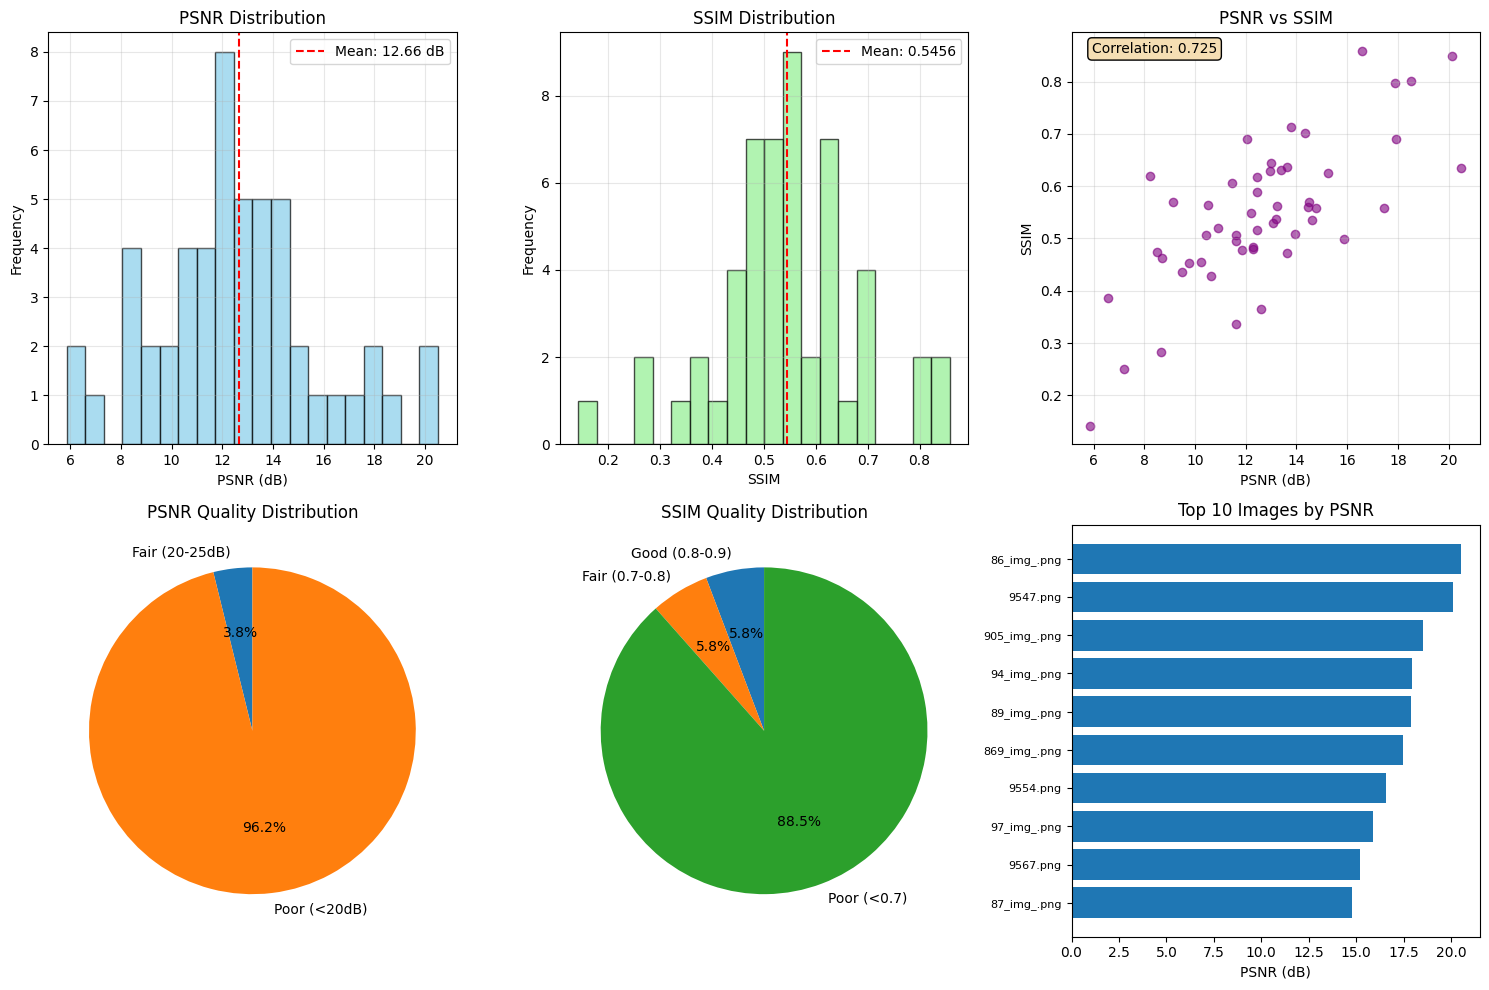

Analysis plots saved to: /content/drive/MyDrive/clearDive/100_dehazed_cropped/psnr_ssim_analysis.png

TESTING SPECIFIC IMAGE PAIR
Test Image: 9_img_.png
PSNR: 13.41 dB
SSIM: 0.6304
MSE: 0.045648
MAE: 0.164682


In [ ]:
# Usage
dehazed_dir = "/content/drive/MyDrive/clearDive/100_dehazed_cropped"
reference_dir = "/content/drive/MyDrive/clearDive/100_reference_cropped"

# Initialize evaluator
evaluator = PSNRSSIMEvaluator(dehazed_dir, reference_dir)

# Process all images
print("Starting PSNR and SSIM evaluation...")
results_df = evaluator.process_all_images()

if len(results_df) > 0:
    # Generate report
    final_results = evaluator.generate_report(results_df)

    # Save results
    output_path = os.path.join(dehazed_dir, "psnr_ssim_results.csv")
    results_df.to_csv(output_path, index=False)
    print(f"\nResults saved to: {output_path}")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # Remove NaN values for plotting
    plot_df = results_df.dropna()

    if len(plot_df) > 0:
        # Plot 1: PSNR distribution
        plt.subplot(2, 3, 1)
        plt.hist(plot_df['psnr'], bins=20, alpha=0.7, edgecolor='black', color='skyblue')
        plt.xlabel('PSNR (dB)')
        plt.ylabel('Frequency')
        plt.title('PSNR Distribution')
        plt.grid(True, alpha=0.3)
        plt.axvline(plot_df['psnr'].mean(), color='red', linestyle='--',
                   label=f'Mean: {plot_df["psnr"].mean():.2f} dB')
        plt.legend()

        # Plot 2: SSIM distribution
        plt.subplot(2, 3, 2)
        plt.hist(plot_df['ssim'], bins=20, alpha=0.7, edgecolor='black', color='lightgreen')
        plt.xlabel('SSIM')
        plt.ylabel('Frequency')
        plt.title('SSIM Distribution')
        plt.grid(True, alpha=0.3)
        plt.axvline(plot_df['ssim'].mean(), color='red', linestyle='--',
                   label=f'Mean: {plot_df["ssim"].mean():.4f}')
        plt.legend()

        # Plot 3: PSNR vs SSIM scatter
        plt.subplot(2, 3, 3)
        plt.scatter(plot_df['psnr'], plot_df['ssim'], alpha=0.6, color='purple')
        plt.xlabel('PSNR (dB)')
        plt.ylabel('SSIM')
        plt.title('PSNR vs SSIM')
        plt.grid(True, alpha=0.3)

        # Add correlation coefficient
        correlation = plot_df['psnr'].corr(plot_df['ssim'])
        plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

        # Plot 4: Quality categories pie chart (PSNR)
        plt.subplot(2, 3, 4)
        psnr_categories = []
        psnr_counts = []
        if len(plot_df[plot_df['psnr'] >= 30]) > 0:
            psnr_categories.append('Excellent (≥30dB)')
            psnr_counts.append(len(plot_df[plot_df['psnr'] >= 30]))
        if len(plot_df[(plot_df['psnr'] >= 25) & (plot_df['psnr'] < 30)]) > 0:
            psnr_categories.append('Good (25-30dB)')
            psnr_counts.append(len(plot_df[(plot_df['psnr'] >= 25) & (plot_df['psnr'] < 30)]))
        if len(plot_df[(plot_df['psnr'] >= 20) & (plot_df['psnr'] < 25)]) > 0:
            psnr_categories.append('Fair (20-25dB)')
            psnr_counts.append(len(plot_df[(plot_df['psnr'] >= 20) & (plot_df['psnr'] < 25)]))
        if len(plot_df[plot_df['psnr'] < 20]) > 0:
            psnr_categories.append('Poor (<20dB)')
            psnr_counts.append(len(plot_df[plot_df['psnr'] < 20]))

        if psnr_counts:
            plt.pie(psnr_counts, labels=psnr_categories, autopct='%1.1f%%', startangle=90)
            plt.title('PSNR Quality Distribution')

        # Plot 5: Quality categories pie chart (SSIM)
        plt.subplot(2, 3, 5)
        ssim_categories = []
        ssim_counts = []
        if len(plot_df[plot_df['ssim'] >= 0.9]) > 0:
            ssim_categories.append('Excellent (≥0.9)')
            ssim_counts.append(len(plot_df[plot_df['ssim'] >= 0.9]))
        if len(plot_df[(plot_df['ssim'] >= 0.8) & (plot_df['ssim'] < 0.9)]) > 0:
            ssim_categories.append('Good (0.8-0.9)')
            ssim_counts.append(len(plot_df[(plot_df['ssim'] >= 0.8) & (plot_df['ssim'] < 0.9)]))
        if len(plot_df[(plot_df['ssim'] >= 0.7) & (plot_df['ssim'] < 0.8)]) > 0:
            ssim_categories.append('Fair (0.7-0.8)')
            ssim_counts.append(len(plot_df[(plot_df['ssim'] >= 0.7) & (plot_df['ssim'] < 0.8)]))
        if len(plot_df[plot_df['ssim'] < 0.7]) > 0:
            ssim_categories.append('Poor (<0.7)')
            ssim_counts.append(len(plot_df[plot_df['ssim'] < 0.7]))

        if ssim_counts:
            plt.pie(ssim_counts, labels=ssim_categories, autopct='%1.1f%%', startangle=90)
            plt.title('SSIM Quality Distribution')

        # Plot 6: Top performing images
        plt.subplot(2, 3, 6)
        top_images = plot_df.nlargest(10, 'psnr')
        if len(top_images) > 0:
            plt.barh(range(len(top_images)), top_images['psnr'])
            plt.yticks(range(len(top_images)),
                      [f[:15] + '...' if len(f) > 15 else f for f in top_images['filename']],
                      fontsize=8)
            plt.xlabel('PSNR (dB)')
            plt.title('Top 10 Images by PSNR')
            plt.gca().invert_yaxis()

        plt.tight_layout()

        # Save plots
        plot_path = os.path.join(dehazed_dir, "psnr_ssim_analysis.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"Analysis plots saved to: {plot_path}")
    else:
        print("No valid data to plot!")
else:
    print("No matching image pairs found! Please check your directory paths and filenames.")

# Test with the specific example you provided
print("\n" + "="*60)
print("TESTING SPECIFIC IMAGE PAIR")
print("="*60)

# Test the specific images mentioned
test_output = "/content/drive/MyDrive/clearDive/100_dehazed_cropped/9_img_.png"
test_reference = "/content/drive/MyDrive/clearDive/100_reference_cropped/9_img_.png"

if os.path.exists(test_output) and os.path.exists(test_reference):
    test_evaluator = PSNRSSIMEvaluator(
        os.path.dirname(test_output),
        os.path.dirname(test_reference)
    )

    result = test_evaluator.process_image_pair("9_img_.png")
    if result:
        print(f"Test Image: 9_img_.png")
        print(f"PSNR: {result['psnr']:.2f} dB")
        print(f"SSIM: {result['ssim']:.4f}")
        print(f"MSE: {result['mse']:.6f}")
        print(f"MAE: {result['mae']:.6f}")
    else:
        print("Failed to process test image pair")
else:
    print("Test image paths not found. Please verify the paths are correct.")

## Testing event data experiment (failed & unnececssary)

DAVIS

In [ ]:
!python demo.py \
  --net_name "" \
  --use_gpu true \
  --model_dir /content/AOD-Net-colab/models \
  --ckpt AOD_9.pkl \
  --test_img_dir /content/drive/MyDrive/clearDive/DAVIS \
  --sample_output_folder /content/drive/MyDrive/clearDive/DAVIS_dehazed


2025-05-25 18:42:27,774 - utils - INFO - Entered module: utils
Namespace(ori_data_path='ori', haze_data_path='haze', val_ori_data_path='val_ori', val_haze_data_path='val_haze', sample_output_folder='/content/drive/MyDrive/clearDive/DAVIS_dehazed', use_gpu=True, gpu=-1, lr=0.0001, num_workers=4, print_gap=50, batch_size=16, val_batch_size=16, epochs=10, model_dir='/content/AOD-Net-colab/models', log_dir='./log', ckpt='AOD_9.pkl', net_name='', weight_decay=0.0001, grad_clip_norm=0.1, test_img_dir='/content/drive/MyDrive/clearDive/DAVIS')
2025-05-25 18:42:27,780 - make_test_data - INFO - Start running make_test_data
2025-05-25 18:42:28,230 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-25 18:42:28,231 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 8192
2025-05-25 18:42:28,424 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-25 18:42:28,424 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 8192
2025-05-25 18:42:28,778 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 1

DAVIS boosted

In [ ]:
!python demo.py \
  --net_name "" \
  --use_gpu true \
  --model_dir /content/AOD-Net-colab/models \
  --ckpt AOD_9.pkl \
  --test_img_dir /content/drive/MyDrive/clearDive/DAVIS_boosted \
  --sample_output_folder /content/drive/MyDrive/clearDive/DAVIS_boosted_dehazed


2025-05-25 18:43:06,659 - utils - INFO - Entered module: utils
Namespace(ori_data_path='ori', haze_data_path='haze', val_ori_data_path='val_ori', val_haze_data_path='val_haze', sample_output_folder='/content/drive/MyDrive/clearDive/DAVIS_boosted_dehazed', use_gpu=True, gpu=-1, lr=0.0001, num_workers=4, print_gap=50, batch_size=16, val_batch_size=16, epochs=10, model_dir='/content/AOD-Net-colab/models', log_dir='./log', ckpt='AOD_9.pkl', net_name='', weight_decay=0.0001, grad_clip_norm=0.1, test_img_dir='/content/drive/MyDrive/clearDive/DAVIS_boosted')
2025-05-25 18:43:06,663 - make_test_data - INFO - Start running make_test_data
2025-05-25 18:43:06,930 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-25 18:43:06,930 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 8192
2025-05-25 18:43:07,113 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-25 18:43:07,113 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 41 8192
2025-05-25 18:43:07,495 - PIL.PngImagePlugin - DEBUG - 

results of both are unflattering i think i need to fine tune the model

#Fine Tuning

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

ref_dir = "/content/drive/MyDrive/clearDive/reference-890"
raw_dir = "/content/drive/MyDrive/clearDive/raw-890"

# Get filenames that exist in both folders
image_files = sorted([
    f for f in os.listdir(ref_dir)
    if f.lower().endswith(('.jpg', '.png')) and os.path.exists(os.path.join(raw_dir, f))
])

# Train/val split
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Create paired dirs
out_root = "/content/drive/MyDrive/clearDive"
paths = {
    "train_ref": os.path.join(out_root, "train/reference"),
    "train_raw": os.path.join(out_root, "train/raw"),
    "val_ref": os.path.join(out_root, "val/reference"),
    "val_raw": os.path.join(out_root, "val/raw"),
}

for path in paths.values():
    os.makedirs(path, exist_ok=True)

# Copy paired files
for fname in train_files:
    shutil.copy(os.path.join(ref_dir, fname), os.path.join(paths["train_ref"], fname))
    shutil.copy(os.path.join(raw_dir, fname), os.path.join(paths["train_raw"], fname))

for fname in val_files:
    shutil.copy(os.path.join(ref_dir, fname), os.path.join(paths["val_ref"], fname))
    shutil.copy(os.path.join(raw_dir, fname), os.path.join(paths["val_raw"], fname))

print("✅ Paired train/val split complete!")


✅ Paired train/val split complete!


In [ ]:
from pathlib import Path

base = Path("/content/drive/MyDrive/clearDive")
for sub in ["train/reference", "train/raw", "val/reference", "val/raw"]:
    folder = base / sub
    count = len(list(folder.glob("*.jpg"))) + len(list(folder.glob("*.png")))
    print(f"{sub}: {count} files")


train/reference: 712 files
train/raw: 712 files
val/reference: 178 files
val/raw: 178 files


In [8]:
!python train.py \
  --epochs 5 \
  --net_name colab-run \
  --resume_from /content/drive/MyDrive/aodnet_checkpoints/AOD_9.pkl \
  --use_gpu true \
  --gpu 0 \
  --ori_data_path /content/drive/MyDrive/clearDive/train/reference \
  --haze_data_path /content/drive/MyDrive/clearDive/train/raw \
  --val_ori_data_path /content/drive/MyDrive/clearDive/val/reference \
  --val_haze_data_path /content/drive/MyDrive/clearDive/val/raw \
  --model_dir ./models \
  --log_dir ./logs \
  --sample_output_folder ./samples


Streaming output truncated to the last 5000 lines.
2025-05-27 15:52:04,570 - PIL.PngImagePlugin - DEBUG - b'tIME' 41 7 (unknown)
2025-05-27 15:52:04,570 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 60 8192
2025-05-27 15:52:04,580 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-27 15:52:04,580 - PIL.PngImagePlugin - DEBUG - STREAM b'tIME' 41 7
2025-05-27 15:52:04,580 - PIL.PngImagePlugin - DEBUG - b'tIME' 41 7 (unknown)
2025-05-27 15:52:04,580 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 60 8192
2025-05-27 15:52:04,639 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-27 15:52:04,639 - PIL.PngImagePlugin - DEBUG - STREAM b'tIME' 41 7
2025-05-27 15:52:04,639 - PIL.PngImagePlugin - DEBUG - b'tIME' 41 7 (unknown)
2025-05-27 15:52:04,639 - PIL.PngImagePlugin - DEBUG - STREAM b'IDAT' 60 8192
2025-05-27 15:52:04,646 - PIL.PngImagePlugin - DEBUG - STREAM b'IHDR' 16 13
2025-05-27 15:52:04,646 - PIL.PngImagePlugin - DEBUG - STREAM b'tIME' 41 7
2025-05-27 15:52:04,646 - PI

In [14]:
# 📍 Paths
NET_NAME = ""  # ← no subfolder
CKPT_NAME = "AOD_14.pkl"
MODEL_DIR = "/content/AOD-Net-colab/models/colab-run"
TEST_IMG_DIR = "/content/drive/MyDrive/clearDive/Inp"
SAVE_DIR = "/content/drive/MyDrive/clearDive/testresults"

# ✅ Ensure results directory exists
import os
os.makedirs(SAVE_DIR, exist_ok=True)

# 🚀 Run demo.py with corrected model path
!python demo.py \
  --net_name "$NET_NAME" \
  --use_gpu true \
  --model_dir $MODEL_DIR \
  --ckpt $CKPT_NAME \
  --test_img_dir $TEST_IMG_DIR \
  --sample_output_folder $SAVE_DIR


2025-05-27 16:35:36,077 - utils - INFO - Entered module: utils
Namespace(ori_data_path='ori', haze_data_path='haze', val_ori_data_path='val_ori', val_haze_data_path='val_haze', sample_output_folder='/content/drive/MyDrive/clearDive/testresults', use_gpu=True, gpu=-1, lr=0.0001, num_workers=4, print_gap=50, batch_size=16, val_batch_size=16, epochs=10, model_dir='/content/AOD-Net-colab/models/colab-run', log_dir='./log', ckpt='AOD_14.pkl', net_name='', weight_decay=0.0001, grad_clip_norm=0.1, resume_from='', reset_optim=False, test_img_dir='/content/drive/MyDrive/clearDive/Inp')
2025-05-27 16:35:38,399 - make_test_data - INFO - Start running make_test_data
2025-05-27 16:35:58,904 - make_test_data - INFO - Done running make_test_data
2025-05-27 16:35:58,904 - load_pretrain_network - INFO - Start running load_pretrain_network
🔄 Loading model from: /content/AOD-Net-colab/models/colab-run/AOD_14.pkl
2025-05-27 16:35:58,916 - load_pretrain_network - INFO - Done running load_pretrain_network
🚀


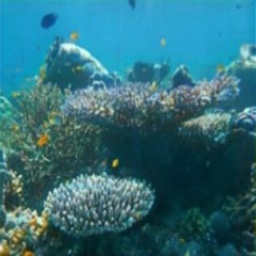
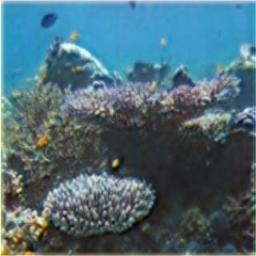

In [17]:
from IPython.display import display, HTML
import base64

dehazed_path = "/content/drive/MyDrive/clearDive/Inp/test_p609_.jpg"
reference_path = "/content/drive/MyDrive/clearDive/testresults/test_p609_.jpg"

def image_to_base64(path):
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

def show_side_by_side(output_path, reference_path, labels=("After Fine tuning", "Raw")):
    output_img = image_to_base64(output_path)
    ref_img = image_to_base64(reference_path)

    html = f"""
    <div style="display: flex; justify-content: space-around;">
        <div>
            <p style="text-align:center">{labels[0]}</p>
            <img src="data:image/png;base64,{output_img}" style="max-height:300px;">
        </div>
        <div>
            <p style="text-align:center">{labels[1]}</p>
            <img src="data:image/png;base64,{ref_img}" style="max-height:300px;">
        </div>
    </div>
    """
    display(HTML(html))

# Call it
show_side_by_side(dehazed_path, reference_path)


## Comparing before and after finetuning results

In [29]:
# Setup paths
ckpts = {
    "before_finetune": "AOD_9.pkl",
    "after_finetune": "AOD_13.pkl"
}

model_dir = "/content/AOD-Net-colab/models"
test_img_dir = "/content/drive/MyDrive/clearDive/Inp"
save_base = "/content/drive/MyDrive/clearDive"

# Run demo for each checkpoint
for label, ckpt_name in ckpts.items():
    output_folder = os.path.join(save_base, f"test_{label}")
    os.makedirs(output_folder, exist_ok=True)

    print(f"🛠 Running inference for: {label}")
    !python /content/AOD-Net-colab/demo.py \
        --net_name "" \
        --use_gpu true \
        --model_dir $model_dir \
        --ckpt $ckpt_name \
        --test_img_dir $test_img_dir \
        --sample_output_folder $output_folder


🛠 Running inference for: before_finetune
2025-05-27 17:08:36,388 - utils - INFO - Entered module: utils
Namespace(ori_data_path='ori', haze_data_path='haze', val_ori_data_path='val_ori', val_haze_data_path='val_haze', sample_output_folder='/content/drive/MyDrive/clearDive/test_before_finetune', use_gpu=True, gpu=-1, lr=0.0001, num_workers=4, print_gap=50, batch_size=16, val_batch_size=16, epochs=10, model_dir='/content/AOD-Net-colab/models', log_dir='./log', ckpt='AOD_9.pkl', net_name='', weight_decay=0.0001, grad_clip_norm=0.1, resume_from='', reset_optim=False, test_img_dir='/content/drive/MyDrive/clearDive/Inp')
2025-05-27 17:08:36,417 - make_test_data - INFO - Start running make_test_data
2025-05-27 17:08:40,629 - make_test_data - INFO - Done running make_test_data
2025-05-27 17:08:40,629 - load_pretrain_network - INFO - Start running load_pretrain_network
🔄 Loading model from: /content/AOD-Net-colab/models/AOD_9.pkl
2025-05-27 17:08:40,639 - load_pretrain_network - INFO - Done run

In [30]:
test_dir = "/content/drive/MyDrive/clearDive/test_after_finetune"

In [31]:
from pathlib import Path

# Assuming the class is already defined (UnderwaterImageQualityAssessment)
qa = UnderwaterImageQualityAssessment(test_dir)
print("🚀 Running quality evaluation on dehazed images...")
df = qa.process_directory()
qa.generate_report(df)


🚀 Running quality evaluation on dehazed images...
Processing: test_p52_.jpg
Processing: test_p23_.jpg
Processing: test_p48_.jpg
Processing: test_p20_.jpg
Processing: test_p30_.jpg
Processing: test_p7_.jpg
Processing: test_p49_.jpg
Processing: test_p56_.jpg
Processing: test_p22_.jpg
Processing: test_p63_.jpg
Processing: test_p83_.jpg
Processing: test_p72_.jpg
Processing: test_p68_.jpg
Processing: test_p17_.jpg
Processing: test_p69_.jpg
Processing: test_p71_.jpg
Processing: test_p59_.jpg
Processing: test_p6_.jpg
Processing: test_p80_.jpg
Processing: test_p34_.jpg
Processing: test_p2_.jpg
Processing: test_p3_.jpg
Processing: test_p54_.jpg
Processing: test_p50_.jpg
Processing: test_p78_.jpg
Processing: test_p45_.jpg
Processing: test_p51_.jpg
Processing: test_p26_.jpg
Processing: test_p21_.jpg
Processing: test_p41_.jpg
Processing: test_p11_.jpg
Processing: test_p36_.jpg
Processing: test_p40_.jpg
Processing: test_p8_.jpg
Processing: test_p15_.jpg
Processing: test_p14_.jpg
Processing: test_p6

,filename,uciqe,uiqm,uicm,uism,uiconm,niqe_like,entropy,avg_gradient,variance,std_dev,mean_brightness
0,test_p52_.jpg,3.033390,33.543861,0.006433,0.039973,9.378758,0.198074,14.012816,0.015010,0.009287,0.096371,0.618633
1,test_p23_.jpg,3.257262,80.799866,0.017481,0.067388,22.593761,0.195231,14.637222,0.023151,0.045475,0.213249,0.343003
2,test_p48_.jpg,10.847261,73.572632,0.043164,0.115720,20.568130,0.221177,15.536233,0.042485,0.044506,0.210964,0.440855
3,test_p20_.jpg,3.971398,71.156487,0.017196,0.064506,19.896780,0.199358,14.545339,0.021741,0.034729,0.186356,0.266109
4,test_p30_.jpg,4.722576,88.339035,0.034662,0.103300,24.699343,0.217616,15.411574,0.037265,0.054069,0.232527,0.427348
...,...,...,...,...,...,...,...,...,...,...,...,...
510,test_p604_.jpg,8.166791,80.725616,0.030034,0.103029,22.569950,0.220256,15.240214,0.037685,0.045182,0.212561,0.309762
511,test_p610_.jpg,3.815889,50.424801,0.017210,0.065788,14.098086,0.222530,15.174858,0.025552,0.020572,0.143428,0.566887
512,test_p611_.jpg,3.171993,52.987724,0.015606,0.066412,14.814890,0.193548,14.552776,0.022846,0.019488,0.139601,0.308494
513,test_p599_.jpg,4.212894,67.911537,0.017321,0.055953,18.989882,0.187927,15.060152,0.019814,0.035539,0.188518,0.617170


In [24]:
test_dir = "/content/drive/MyDrive/clearDive/test_before_finetune"

In [25]:
qa = UnderwaterImageQualityAssessment(test_dir)
print("🚀 Running quality evaluation on dehazed images...")
df = qa.process_directory()
qa.generate_report(df)

🚀 Running quality evaluation on dehazed images...
Processing: test_p52_.jpg
Processing: test_p23_.jpg
Processing: test_p48_.jpg
Processing: test_p20_.jpg
Processing: test_p30_.jpg
Processing: test_p7_.jpg
Processing: test_p49_.jpg
Processing: test_p56_.jpg
Processing: test_p22_.jpg
Processing: test_p63_.jpg
Processing: test_p83_.jpg
Processing: test_p72_.jpg
Processing: test_p68_.jpg
Processing: test_p17_.jpg
Processing: test_p69_.jpg
Processing: test_p71_.jpg
Processing: test_p59_.jpg
Processing: test_p6_.jpg
Processing: test_p80_.jpg
Processing: test_p34_.jpg
Processing: test_p2_.jpg
Processing: test_p3_.jpg
Processing: test_p54_.jpg
Processing: test_p50_.jpg
Processing: test_p78_.jpg
Processing: test_p45_.jpg
Processing: test_p51_.jpg
Processing: test_p26_.jpg
Processing: test_p21_.jpg
Processing: test_p41_.jpg
Processing: test_p11_.jpg
Processing: test_p36_.jpg
Processing: test_p40_.jpg
Processing: test_p8_.jpg
Processing: test_p15_.jpg
Processing: test_p14_.jpg
Processing: test_p6

,filename,uciqe,uiqm,uicm,uism,uiconm,niqe_like,entropy,avg_gradient,variance,std_dev,mean_brightness
0,test_p52_.jpg,5.360185,45.315681,0.009906,0.055597,12.669981,0.211022,15.023024,0.020629,0.014916,0.122132,0.395708
1,test_p23_.jpg,4.399280,68.535484,0.020903,0.062814,19.163803,0.200136,14.531828,0.021701,0.029513,0.171795,0.270084
2,test_p48_.jpg,10.306378,74.765991,0.052981,0.130916,20.900578,1249.971436,15.444387,0.048625,0.039885,0.199711,0.329883
3,test_p20_.jpg,4.055460,56.103340,0.016505,0.061244,15.686737,56.557377,14.479249,0.020886,0.020704,0.143889,0.244996
4,test_p30_.jpg,6.825382,81.317383,0.037114,0.105028,22.735247,0.225173,15.052957,0.038266,0.040629,0.201566,0.325674
...,...,...,...,...,...,...,...,...,...,...,...,...
510,test_p604_.jpg,8.607306,70.376106,0.030811,0.100451,19.675432,0.227295,15.068578,0.037394,0.032259,0.179609,0.242029
511,test_p610_.jpg,4.094203,57.722904,0.021861,0.079460,16.138176,0.228593,15.245490,0.031101,0.023246,0.152465,0.420436
512,test_p611_.jpg,4.511328,50.727207,0.018056,0.065317,14.182700,0.207988,14.282556,0.022464,0.016625,0.128939,0.182882
513,test_p599_.jpg,7.264180,76.773209,0.025691,0.063874,21.467743,0.190035,15.261692,0.022340,0.038121,0.195246,0.449128


In [32]:
from IPython.display import display, HTML
import base64

def image_to_base64(path):
    """Convert image at `path` to base64-encoded string for inline HTML display."""
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

def show_3_images(img1_path, img2_path, img3_path, labels=("Input", "Before FT", "After FT")):
    """Display 3 images side by side with custom labels."""
    img1 = image_to_base64(img1_path)
    img2 = image_to_base64(img2_path)
    img3 = image_to_base64(img3_path)

    html = f"""
    <div style="display: flex; justify-content: space-around; gap: 20px;">
        <div>
            <p style="text-align:center">{labels[0]}</p>
            <img src="data:image/png;base64,{img1}" style="max-height:300px;">
        </div>
        <div>
            <p style="text-align:center">{labels[1]}</p>
            <img src="data:image/png;base64,{img2}" style="max-height:300px;">
        </div>
        <div>
            <p style="text-align:center">{labels[2]}</p>
            <img src="data:image/png;base64,{img3}" style="max-height:300px;">
        </div>
    </div>
    """
    display(HTML(html))



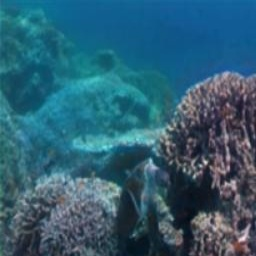
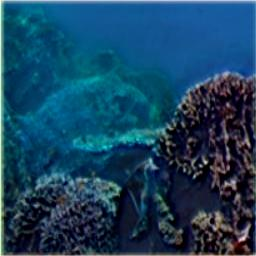
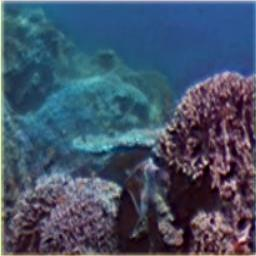

In [33]:
show_3_images(
    "/content/drive/MyDrive/clearDive/Inp/test_p49_.jpg",
    "/content/drive/MyDrive/clearDive/test_before_finetune/test_p49_.jpg",
    "/content/drive/MyDrive/clearDive/test_after_finetune/test_p49_.jpg"
)
